# Python Project: Football Manager 2020
### 1. Use BeautifulSoup to find all players with value above £20M or wage above £75k per week
### 2. Data Cleaning 
### 3. Data Exploration and Visualisation
* Is the EPL the most valuable league in the world?


### Import packages

In [1]:
!pip install beautifulsoup4

In [2]:
import bs4
from bs4 import BeautifulSoup

bs4.__version__

'4.9.1'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import requests
import re

### Web Scraping and Data Cleaning
* Perform scraping process across multiple web pages 
* Scraping function run twice, once for players with value above £20M, and once for players with wage above £75k per week to capture a union of both conditions 
* Perform initial data cleaning for tidy data before exporting. This ensures easier steps for subsequent data cleaning.  
* Export 2 csv files with same headers, to be outer joined in subsequent steps

In [16]:
url_v = 'https://www.fmscout.com/players.html?id=2244758' # filter by player value 
url_w = 'https://www.fmscout.com/players.html?id=2244761' # filter by player wage 
# note that id is valid for only X minutes 

In [17]:
# function for web scraping and initial data cleaning
def get_page(page):
    url = url_w # do the same for url_v and url_w
    url_next = url+f'&page={page}'
   
    resp = requests.get(url_next)    
    soup = BeautifulSoup(resp.text) # make soup 
    tables = soup.find_all('table') 
    tr_list = tables[0].find_all('tr')
    data = []

    for tr in tr_list:
        td_list = tr.find_all('td') # find all table data and append each row as an element in a list 
        row = [td.text for td in td_list]
        if row:
            data.append(row)

    dels = [0,8,9] # delete unused columns, namely Status, Rating and Screenshots
    for i in range(len(data)):
        for j in sorted(dels, reverse = True): 
            del data[i][j] 

    data = data[1:] # delete header row, header is separately created
  
    ints = [1,4,5,6] # cols whose data type is supposed to be int 
    for i in range(len(data)):
        for j in ints:
            data[i][j] = int(re.sub("[^0-9]","",data[i][j])) # remove all non-integer characters
    
    stripper = [0,2] # strip remaining cols of whitespace 
    for i in range(len(data)):
        for k in stripper: 
            data[i][k] = data[i][k].strip()
    
    for i in range(len(data)): # split Name and Position 
        data[i][0] = data[i][0].split('\n',1)
        data[i][0][1] = data[i][0][1].replace('\n','').replace('\xa0',' ')
        
        # unpacking Name and Position
        for j in data[i][0]: 
            data[i].insert(-6,j)
        
        data[i].pop(0) # remove nested list ['Name','Position']   

    return(data)

In [18]:
# test the function 
get_page(1)[:5]

[['Aaron Ramsey', 'AMR AMC', 28, 'WAL', 'Zebre', 178, 176, 34],
 ['Aaron Wan-Bissaka', 'DR WBR', 21, 'ENG', 'Man Utd', 183, 80, 25],
 ['Abdou Diallo', 'DL DC', 23, 'FRA', 'Paris SG', 186, 83, 14],
 ['Adam Lallana', 'DM AMR AML AMC', 31, 'ENG', 'Liverpool', 173, 110, 24],
 ['Adrien Rabiot', 'MC', 24, 'FRA', 'Zebre', 188, 176, 34]]

In [19]:
pages = [1,2,3,4,5] # there are 5 pages of results 
result = []

for page in pages: # combining all pages 
    result.append(get_page(page))
    
flat_result = [item for sublist in result for item in sublist] # flattening nested lists to return single list 
flat_result[:5]

[['Aaron Ramsey', 'AMR AMC', 28, 'WAL', 'Zebre', 178, 176, 34],
 ['Aaron Wan-Bissaka', 'DR WBR', 21, 'ENG', 'Man Utd', 183, 80, 25],
 ['Abdou Diallo', 'DL DC', 23, 'FRA', 'Paris SG', 186, 83, 14],
 ['Adam Lallana', 'DM AMR AML AMC', 31, 'ENG', 'Liverpool', 173, 110, 24],
 ['Adrien Rabiot', 'MC', 24, 'FRA', 'Zebre', 188, 176, 34]]

In [20]:
len(flat_result)

399

In [12]:
# same headers. do not need to rerun for other dataset 
url = url_v 
url_next = url+f'&page={page}'
   
resp = requests.get(url_next)    
soup = BeautifulSoup(resp.text) # make soup 
tables = soup.find_all('table') 

In [13]:
# same headers. do not need to rerun for other dataset 
thead_list = tables[0].find_all('thead')
header = [thead.text for thead in thead_list]
header = header[0].split('\n')

index = [0,1,2,10,11,12,13] # delete unnecessary columns such as Status and Screenshots

for i in sorted(index, reverse=True):
    del header[i]

# Rename headers to include unit of measure
header[4] += ' (cm)'
header[5] += ' (£\'000 per week)'
header[6] += ' (£\'M)'
header[0] = header[0].split('&')

# unpacking Name and Position
for i in header[0]: 
    header.insert(-6,i)

header.pop(0) # remove nested list ['Name','Position'] 

for i in range(len(header)):
    header[i] = header[i].strip()

print(header)

['Name', 'Position', 'Age', 'Nation', 'Club', 'Height (cm)', "Wage (£'000 per week)", "Value (£'M)"]


In [21]:
with open('fm_wage.csv','w',newline='') as f: # export 2 files fm_value and fm_wage
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(flat_result)

In [22]:
!notepad fm_wage.csv

### Data Cleaning

Many of the data cleaning steps have been done in the get_page( ) function.
* Removing usused columns 
* Removing non-numeric characters 
* Changing data type 
* Stripping of whitespace 
* Renaming column headers and 
* Splitting of combined columns 
<br><br>

Further refinement required. 
* Merging data frames
* Removing duplicates 
* Reindexing 
* Detecting and correcting outliers and anomalies 
<br><br>

Finally export clean file as csv. 

In [23]:
dfv = pd.read_csv('fm_value.csv', encoding = 'cp1252') # why is there a need to encode cp1252?
dfw = pd.read_csv('fm_wage.csv', encoding = 'cp1252')
df = pd.concat([dfv,dfw])
df.head() # sorted by Name 

,Name,Position,Age,Nation,Club,Height (cm),Wage (£'000 per week),Value (£'M)
0,Aaron Mooy,AMC,28,AUS,Brighton,179,35,23
1,Aaron Ramsey,AMR AMC,28,WAL,Zebre,178,176,34
2,Aaron Wan-Bissaka,DR WBR,21,ENG,Man Utd,183,80,25
3,Abdoulaye Doucoure,DM AMC,26,FRA,Watford,183,70,28
4,Adam Lallana,DM AMR AML AMC,31,ENG,Liverpool,173,110,24


In [24]:
df.shape

(833, 8)

In [25]:
len(dfv), len(dfw)

(434, 399)

In [26]:
# check for duplicates 
df.duplicated().sum() # there are 269 duplicates 

269

In [27]:
df.drop_duplicates(subset='Name', inplace=True) # drop duplicated players 

In [28]:
df.duplicated(subset='Name').any() # check if duplicates have been removed 

False

In [29]:
df.shape # 564 records, 8 column headers 

(564, 8)

In [30]:
df.reset_index(drop=True, inplace = True) # reset index while dropping old index 
df.head()

,Name,Position,Age,Nation,Club,Height (cm),Wage (£'000 per week),Value (£'M)
0,Aaron Mooy,AMC,28,AUS,Brighton,179,35,23
1,Aaron Ramsey,AMR AMC,28,WAL,Zebre,178,176,34
2,Aaron Wan-Bissaka,DR WBR,21,ENG,Man Utd,183,80,25
3,Abdoulaye Doucoure,DM AMC,26,FRA,Watford,183,70,28
4,Adam Lallana,DM AMR AML AMC,31,ENG,Liverpool,173,110,24


In [31]:
df.info() # there are no missing values - data imputation is not required 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   564 non-null    object
 1   Position               564 non-null    object
 2   Age                    564 non-null    int64 
 3   Nation                 564 non-null    object
 4   Club                   564 non-null    object
 5   Height (cm)            564 non-null    int64 
 6   Wage (£'000 per week)  564 non-null    int64 
 7   Value (£'M)            564 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 35.4+ KB


In [32]:
df.isna().sum() # double check - no missing values 

Name                     0
Position                 0
Age                      0
Nation                   0
Club                     0
Height (cm)              0
Wage (£'000 per week)    0
Value (£'M)              0
dtype: int64

In [33]:
df.describe() # check for outliers and anomaly 
# the minimum wage is £1,000 per week. it is not possible. 
# the maximun value is £991M. it is not possible. 

,Age,Height (cm),Wage (£'000 per week),Value (£'M)
count,564.000000,564.000000,564.000000,564.000000
mean,26.625887,181.643617,115.588652,36.452128
std,3.726927,6.608752,91.797392,75.594455
min,18.000000,163.000000,1.000000,2.000000
25%,24.000000,177.000000,61.000000,21.000000
50%,26.000000,182.000000,92.000000,27.000000
75%,29.000000,186.250000,138.000000,37.000000
max,38.000000,199.000000,950.000000,991.000000


In [34]:
# investigate wages
df[df["Wage (£'000 per week)"] == 1] 
# Messi is the highest paid footballer in the world. 
# His wages are supposed to be £1,000k per week, not £1,000 per week

,Name,Position,Age,Nation,Club,Height (cm),Wage (£'000 per week),Value (£'M)
250,Lionel Messi,AMR AMC ST,32,ARG,Barcelona,170,1,72


In [35]:
# Amend Messi's wages 
df.at[250,"Wage (£'000 per week)"] = 1000
df[df["Wage (£'000 per week)"] > 800] # Messi's wages have been amended 

,Name,Position,Age,Nation,Club,Height (cm),Wage (£'000 per week),Value (£'M)
79,Cristiano Ronaldo,AMR AML ST,34,POR,Zebre,185,950,30
250,Lionel Messi,AMR AMC ST,32,ARG,Barcelona,170,1000,72


In [36]:
# investigate value 
df.sort_values(by="Value (£'M)", ascending=False)[:10] # filter top 10 players by value 

,Name,Position,Age,Nation,Club,Height (cm),Wage (£'000 per week),Value (£'M)
452,Borja Valero,AMC,34,ESP,Inter,175,77,991
487,Ignacio Rivero,AMR AML,27,URU,Tijuana,166,155,952
540,Pepe Reina,GK,36,ESP,Aston Villa,188,92,802
488,Iker Casillas,GK,38,ESP,FCP,182,108,785
563,Zlatan Ibrahimovic,ST,37,SWE,LA Galaxy,195,108,401
451,Bastian Schweinsteiger,DC DM,34,GER,Chicago,183,84,189
316,Neymar,AML AMC ST,27,BRA,Paris SG,175,606,91
231,Kevin De Bruyne,AMR AML AMC,28,BEL,Man City,181,230,88
241,Kylian Mbappe,AMR AML ST,20,FRA,Paris SG,178,378,86
114,Eden Hazard,AMR AML AMC,28,BEL,R. Madrid,173,532,82


In [37]:
# logically, Neymar is the world's most expensive player. 
# players above him should have their values reduced by a magnitude of 10^3
df["Value (£'M)"].iloc[[452,487,540,488,563,451]] = df["Value (£'M)"].iloc[[452,487,540,488,563,451]] /1000

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
df.sort_values(by="Value (£'M)", ascending=False)[:10] # filter top 10 players by value 

,Name,Position,Age,Nation,Club,Height (cm),Wage (£'000 per week),Value (£'M)
316,Neymar,AML AMC ST,27,BRA,Paris SG,175,606,91.0
231,Kevin De Bruyne,AMR AML AMC,28,BEL,Man City,181,230,88.0
241,Kylian Mbappe,AMR AML ST,20,FRA,Paris SG,178,378,86.0
114,Eden Hazard,AMR AML AMC,28,BEL,R. Madrid,173,532,82.0
355,Robert Lewandowski,ST,30,POL,FC Bayern,184,331,80.0
371,Sadio Mane,AMR AML ST,27,SEN,Liverpool,175,180,79.0
306,Mohamed Salah,AMR AML ST,27,EGY,Liverpool,175,200,79.0
163,Harry Kane,AMC ST,25,ENG,Tottenham,188,200,77.0
40,Antoine Griezmann,AMR AML AMC ST,28,FRA,Barcelona,175,560,75.0
145,Gareth Bale,AMR AML AMC ST,29,WAL,R. Madrid,185,532,75.0


In [39]:
df.dtypes # dtypes are correct

Name                      object
Position                  object
Age                        int64
Nation                    object
Club                      object
Height (cm)                int64
Wage (£'000 per week)      int64
Value (£'M)              float64
dtype: object

### Save Cleaned DataFrame to CSV 

In [40]:
df.to_csv("fm_clean.csv", index=False)

### Exploratory Data Analysis
* Who are the most expensive players? 
* Who are the highest paid players?
* Which club has the most number of players in this list? What is their median value?
* What is the demographic of the players in this list? How does player value vary with age? 
* What is the distribution of player value? 
* What is the distribution of wages? 
* How does player value vary with wage? 

Finally, is the EPL the most valuable league in the world?

In [41]:
# prepare epl lookup table 
epl = pd.DataFrame(['Arsenal','Aston Villa','Bournemouth','Brighton','Burnley','Chelsea',
       'Crystal Palace','Everton','Fulham','Leicester','Liverpool','Man City',
       'Man Utd','Newcastle','Norwich','Southampton','Sheff Utd','Swansea',
       'Tottenham','Watford','West Ham','Wolves'], columns = ['Club'])
epl['EPL'] = 1
epl.head(3)

,Club,EPL
0,Arsenal,1
1,Aston Villa,1
2,Bournemouth,1


In [42]:
df = pd.read_csv('fm_clean.csv')
df.head()

,Name,Position,Age,Nation,Club,Height (cm),Wage (£'000 per week),Value (£'M)
0,Aaron Mooy,AMC,28,AUS,Brighton,179,35,23.0
1,Aaron Ramsey,AMR AMC,28,WAL,Zebre,178,176,34.0
2,Aaron Wan-Bissaka,DR WBR,21,ENG,Man Utd,183,80,25.0
3,Abdoulaye Doucoure,DM AMC,26,FRA,Watford,183,70,28.0
4,Adam Lallana,DM AMR AML AMC,31,ENG,Liverpool,173,110,24.0


In [43]:
df = pd.merge(df,epl, on='Club', how='left') # execute only once

In [44]:
df['EPL'] = df['EPL'].fillna(0).astype(int)
df.head() 

,Name,Position,Age,Nation,Club,Height (cm),Wage (£'000 per week),Value (£'M),EPL
0,Aaron Mooy,AMC,28,AUS,Brighton,179,35,23.0,1
1,Aaron Ramsey,AMR AMC,28,WAL,Zebre,178,176,34.0,0
2,Aaron Wan-Bissaka,DR WBR,21,ENG,Man Utd,183,80,25.0,1
3,Abdoulaye Doucoure,DM AMC,26,FRA,Watford,183,70,28.0,1
4,Adam Lallana,DM AMR AML AMC,31,ENG,Liverpool,173,110,24.0,1


In [45]:
df.shape # check shape 

(564, 9)

In [46]:
round(df['EPL'].mean(),3)
# More than a third (36.3%) of the world's most expensive or highest paid players play in the EPL 

0.363

<ipython-input-47-d7295758c2d5>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


Text(0.5, 1.0, 'Player proportion')

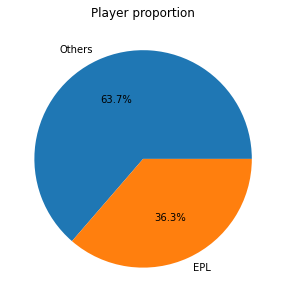

In [47]:
# visualisation 
df['EPL'].value_counts().plot(kind='pie',figsize=(13,5),labels=['Others','EPL'],autopct='%1.1f%%')
plt.axes().set_ylabel('')
plt.title('Player proportion')

In [48]:
# Who are the top 20 most expensive players? 
top_plyr_val = df.sort_values(by="Value (£'M)", ascending=False).head(20)
top_plyr_val = top_plyr_val.sort_values(by="Value (£'M)", ascending = True)

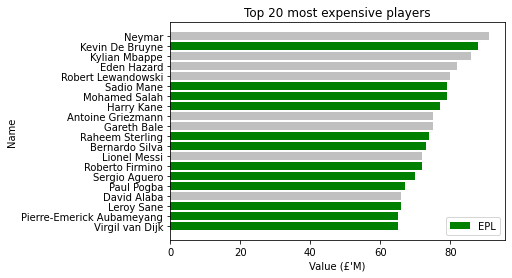

In [49]:
plt.barh(top_plyr_val["Name"], top_plyr_val["Value (£'M)"], color=(top_plyr_val["EPL"]==1).map({True:'g',False:'silver'}))
plt.xlabel("Value (£'M)")
plt.ylabel('Name')
plt.title('Top 20 most expensive players')
plt.legend(['EPL'])
plt.show()

In [50]:
top_plyr_val['EPL'].sum()
# 12 of the 20 most expensive players in the world are from the EPL 

12

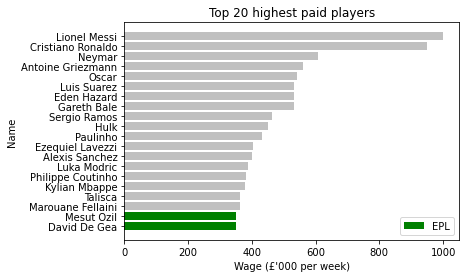

In [51]:
# Who are the top 20 highest paid players?
top_plyr_wag = df.sort_values(by=["Wage (£'000 per week)"], ascending=False).head(20)
top_plyr_wag = top_plyr_wag.sort_values(by="Wage (£'000 per week)", ascending = True)
plt.barh(top_plyr_wag["Name"], top_plyr_wag["Wage (£'000 per week)"], 
         color=(top_plyr_wag["EPL"]==1).map({True:'g',False:'silver'}))
plt.legend(['EPL'])
plt.xlabel("Wage (£'000 per week)")
plt.ylabel('Name')
plt.title('Top 20 highest paid players')
plt.show()
# Messi and Ronaldo are paid significantly more than the rest of the world 

In [52]:
top_plyr_wag['EPL'].sum()
# only 2 of the 20 most highly paid players in the world are from the EPL 
# but in reality, wage is a poor measure of value 

2

In [53]:
# Which are the top 20 clubs with the most players worth > £20M?
plyr_count_club = df.groupby('Club')['Name'].count()
plyr_count_club = plyr_count_club.sort_values(ascending=False)[:20]
plyr_count_club = pd.DataFrame(plyr_count_club)
plyr_count_club = pd.merge(plyr_count_club,epl, on='Club', how='left')
plyr_count_club['EPL'] = plyr_count_club['EPL'].fillna(0).astype(int)
plyr_count_club.rename(columns={'Name':'Count'},inplace=True)
plyr_count_club.head()

,Club,Count,EPL
0,R. Madrid,23,0
1,Chelsea,23,1
2,Man Utd,21,1
3,Man City,21,1
4,Liverpool,21,1


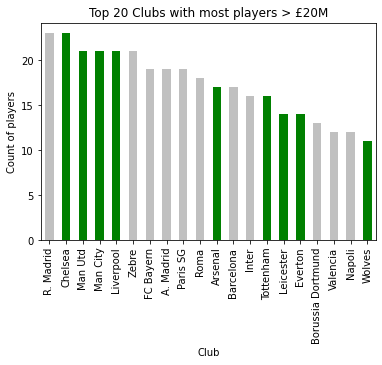

In [54]:
plyr_count_club.plot.bar(x='Club',y='Count', color=(plyr_count_club["EPL"]==1).map({True:'g',False:'silver'}),legend=None)
plt.xlabel('Club')
plt.ylabel("Count of players")
plt.title('Top 20 Clubs with most players > £20M')
plt.show()

In [55]:
plyr_count_club['EPL'].sum()
# Almost half (9/20) of the clubs with most players valued over £20M are from the EPL

9

In [56]:
plyr_val_club = df.groupby('Club')["Value (£'M)"].median()
plyr_val_club = plyr_val_club.sort_values(ascending=False)[:20]
plyr_val_club = pd.DataFrame(plyr_val_club)
plyr_val_club = pd.merge(plyr_val_club,epl, on='Club', how='left')
plyr_val_club['EPL'] = plyr_val_club['EPL'].fillna(0).astype(int)
plyr_val_club.head()

,Club,Value (£'M),EPL
0,Barcelona,47.0,0
1,Man City,45.0,1
2,Liverpool,45.0,1
3,R. Madrid,42.0,0
4,Lazio,38.5,0


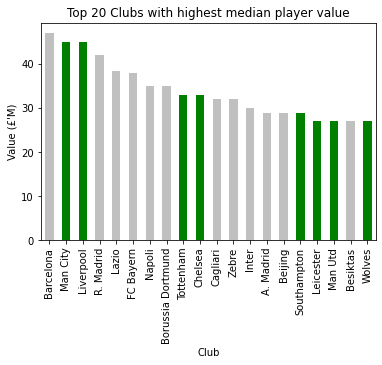

In [57]:
# Which are the top 20 clubs with the highest median player value? 
plyr_val_club.plot.bar(x='Club',y="Value (£'M)", color=(plyr_val_club["EPL"]==1).map({True:'g',False:'silver'}),legend=None)
plt.xlabel('Club')
plt.ylabel("Value (£'M)")
plt.title('Top 20 Clubs with highest median player value')
plt.show()

In [58]:
plyr_val_club['EPL'].sum()
# Almost half (8/20) of the clubs with highest median player value are from the EPL

8

Other data exploration and visualisations 

(17.0, 40.0)

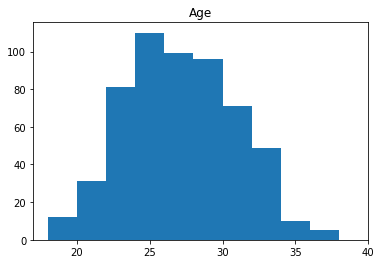

In [59]:
df.hist('Age', grid=False)
plt.xlim(17,40)
# most players are aged between 25 to 30
# most players peak in value at this age 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002429E8A8880>]],
      dtype=object)

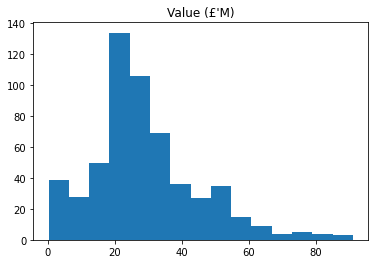

In [60]:
df.hist("Value (£'M)", grid=False, bins = 15)
# histogram seems right-skewed, can do a log transform 
# Most players are worth between £20M to £35M

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002429E7B3610>]],
      dtype=object)

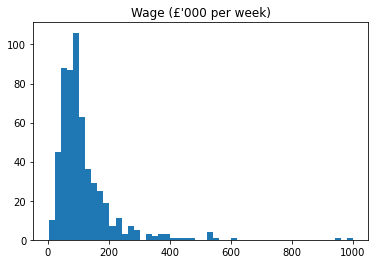

In [61]:
df.hist("Wage (£'000 per week)", grid=False, bins = 50)
# right skewed graph. there are outliers who earn >£300k. To remove for visualisation. 

In [62]:
df[df["Wage (£'000 per week)"]>300]

,Name,Position,Age,Nation,Club,Height (cm),Wage (£'000 per week),Value (£'M),EPL
20,Alexis Sanchez,AMR AML AMC ST,30,CHI,Inter,169,400,35.0,0
40,Antoine Griezmann,AMR AML AMC ST,28,FRA,Barcelona,175,560,75.0,0
79,Cristiano Ronaldo,AMR AML ST,34,POR,Zebre,185,950,30.0,0
91,David De Gea,GK,28,ESP,Man Utd,193,350,49.0,1
114,Eden Hazard,AMR AML AMC,28,BEL,R. Madrid,173,532,82.0,0
145,Gareth Bale,AMR AML AMC ST,29,WAL,R. Madrid,185,532,75.0,0
241,Kylian Mbappe,AMR AML ST,20,FRA,Paris SG,178,378,86.0,0
250,Lionel Messi,AMR AMC ST,32,ARG,Barcelona,170,1000,72.0,0
258,Luis Suarez,AMR AML AMC ST,32,URU,Barcelona,182,532,54.0,0
269,Marcelo,DL WBL ML,31,BRA,R. Madrid,174,331,40.0,0


In [63]:
df1 = df.drop(df[df["Wage (£'000 per week)"]>300].index) # execute only once

In [64]:
df1.reset_index(drop=True, inplace = True) 
df1.shape

(541, 9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002429E222130>]],
      dtype=object)

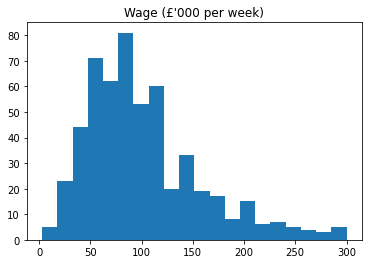

In [65]:
df1.hist("Wage (£'000 per week)", grid=False, bins = 20)
# still there are some high earning outliers. Suggest log transformation.  
# most players earn between £50k and £120k per week 

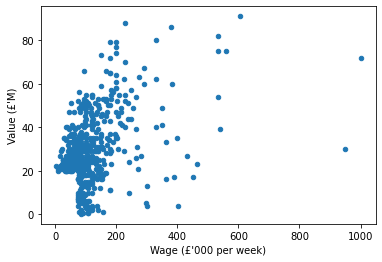

In [66]:
# scatterplot of wage v value - EPL vs Others
df.plot.scatter("Wage (£'000 per week)","Value (£'M)") 
# outliers have skewed the scatter plot. suggest removing the 2 most extreme outliers - Ronaldo and Messi 

In [67]:
df[df["Wage (£'000 per week)"]>800]

,Name,Position,Age,Nation,Club,Height (cm),Wage (£'000 per week),Value (£'M),EPL
79,Cristiano Ronaldo,AMR AML ST,34,POR,Zebre,185,950,30.0,0
250,Lionel Messi,AMR AMC ST,32,ARG,Barcelona,170,1000,72.0,0


In [68]:
df2 = df.drop(df[df["Wage (£'000 per week)"]>800].index) # execute only once

In [69]:
df2.reset_index(drop=True, inplace = True) 
df2.shape

(562, 9)

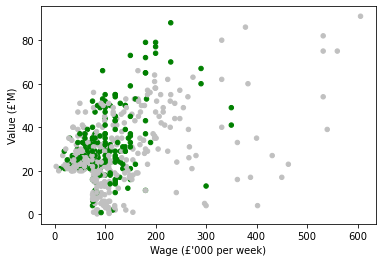

In [70]:
df2.plot.scatter("Wage (£'000 per week)","Value (£'M)", color=(df2["EPL"]==1).map({True:'g',False:'silver'})) 
# good enough for visualisation
# we can see that most EPL players do not reside in the right 2 quadrants 
# ie they are of high value yet do not draw the highest wages. 

### Conclusion
We have met the objectives of this project, demonstrating a grasp of web scraping using BeautifulSoup, as well as data cleaning, exploration and visualisation using numpy, pandas and matplotlib libraries. 
<br>

| Topic | Concepts applied in project |
| :-------- | :----------- |
| Web Scraping and File IO | - Data extraction across multiple pages in a single function using BeautifulSoup<br>- Use list comprehension to flatten nested lists<br>- Write table headings and data to file |
| Data Cleaning | - Removing usused columns<br>- Removing non-numeric characters<br>- Changing data type<br>- Stripping of whitespace<br>- Merging data frames<br>- Removing duplicates<br>- Reindexing<br>- Detecting and correcting outliers and anomalies<br>- Renaming column headers<br>- Splitting of combined columns |
| Data Exploration and Visualisation | - Use pandas and matplotlib libraries to uncover insights<br>- Pie Charts<br>- Barcharts<br>- Histogram<br>- Scatterplot| 

<br>
We also performed EDA to visualise data, answering some questions such as:  

* Who are the most expensive players? 
* Who are the highest paid players?
* Which club has the most number of players in this list? What is their median value?
* What is the demographic of the players in this list? How does player value vary with age? 
* What is the distribution of player value? 
* What is the distribution of wages? 
* How does player value vary with wage? 
<br>

We discover that, EPL players and clubs dominate rankings in 3 of the 4 comparisons, namely: 
* 12 of 20 most expensive players 
* 9 of 20 top clubs with most players in list
* 8 of 20 top clubs by median player value

Although EPL players only make up 2 of the 20 highest paid players, wage is hardly a good measure of value. The scatterplot of wage v value demonstrated that most EPL players are of high value yet do not draw the highest wages. Astronomical wages on mediocre players can be attributed to leagues or clubs splashing cash to attract talent. Moreover, EPL players make up more than a third of all players in the list. We hence conclude that the EPL is the most valuable league in the world. 
<br>


### Improvements
* Scrape a larger database of players for more meaningful and in-depth analysis and visualisations 
* Scrape each players attributes and concat these attributes to dataframe. Require another nested for loop inside the get_page() function. 

Unfortunately FM Scout only returns 5 pages of results. Find a website that returns more pages of results and individual player stats 

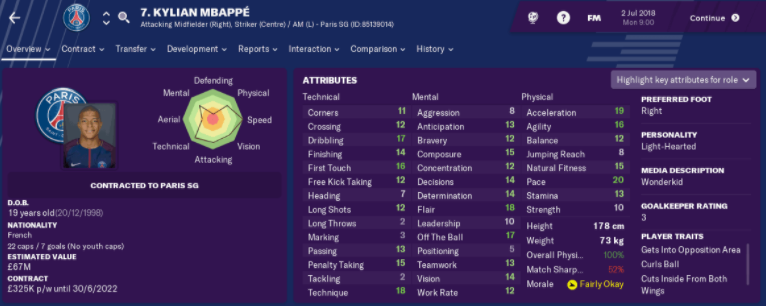